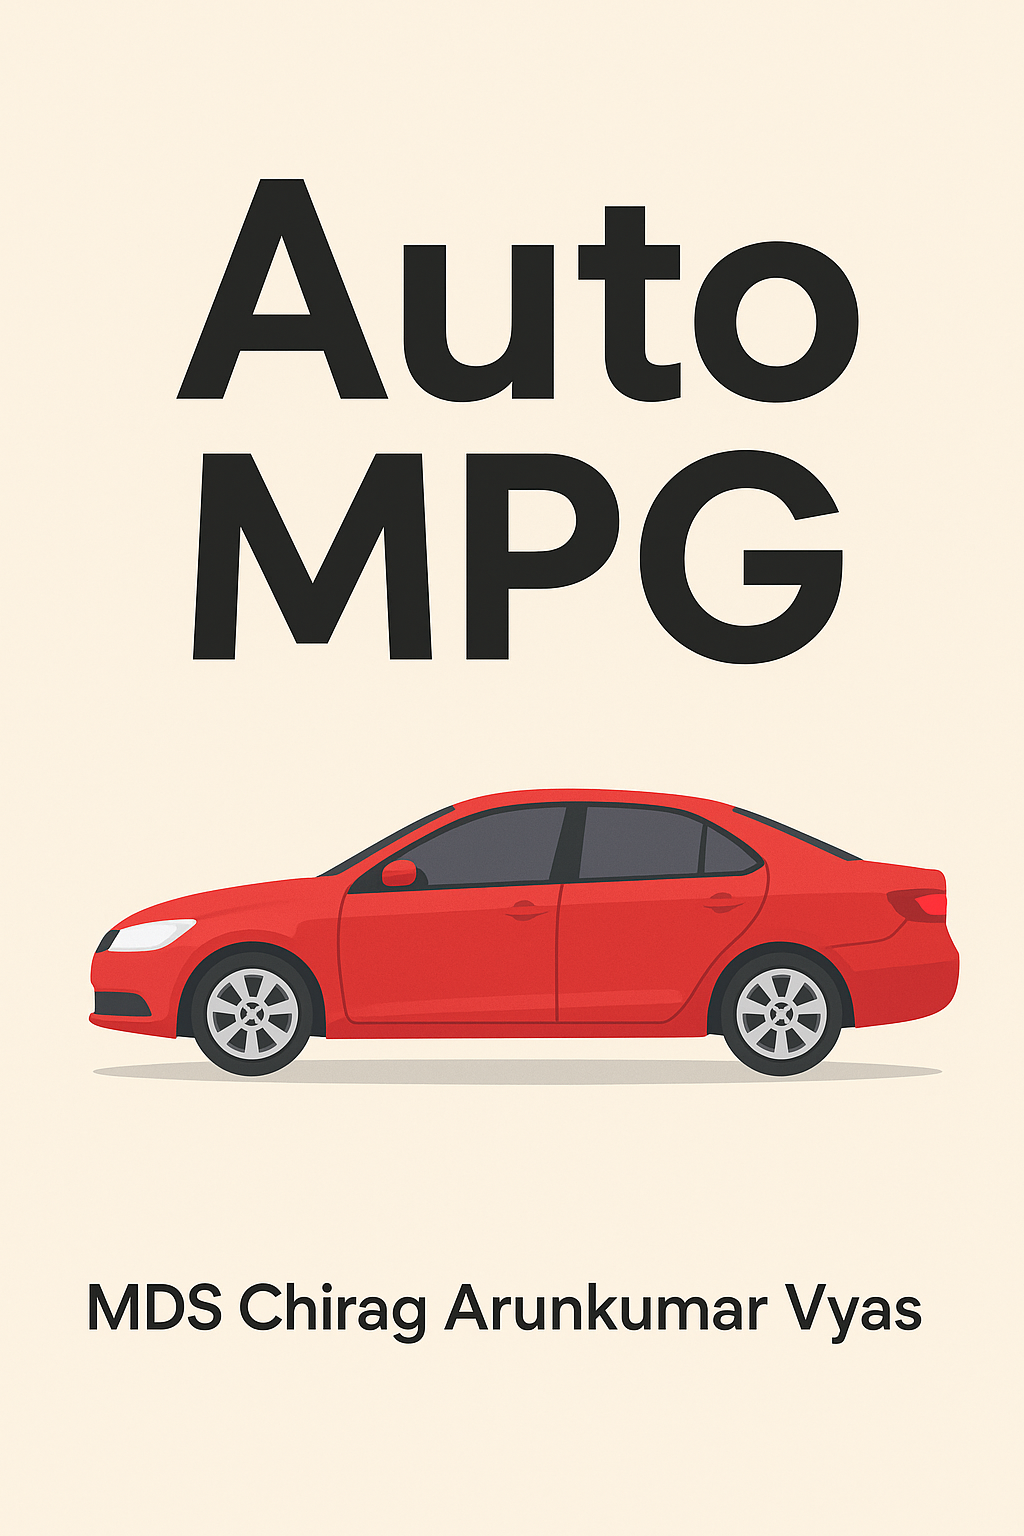

## Step 1 Import necessary Libraries and packages

In [138]:
### importing libraries related to numerical computation and dataframe computation and work
import numpy as np   # For numerical computations, arrays, and mathematical operations
import pandas as pd  # For handling datasets, dataframes, and data manipulation

## importing libraries necessary for visualisation and EDA
import seaborn as sns              # For advanced visualizations, statistical plots, and EDA
import matplotlib.pyplot as plt    # For creating basic plots, graphs, and charts

## importing libraries for data processing and model training
from sklearn.model_selection import train_test_split   # For splitting dataset into training and testing sets
from sklearn.linear_model import LinearRegression      # For building and training Linear Regression models

## importing libraries for model deployment and web interfacing 
import joblib       # import joblib to load saved ML model
import gradio as gr # import gradio for web interface

## Step 2 Load and review data

In [79]:
# Load the dataset from the given CSV file path into a pandas DataFrame
cData = pd.read_csv(r"C:\Users\Chirag Pc\Desktop\daily work\auto-mpg.csv")

# Display the first 5 rows of the dataset to quickly inspect the data
cData.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [80]:
print(f'shape of the dataset it has {cData.shape[0]} rows and {cData.shape[1]} columns')

shape of the dataset it has 398 rows and 9 columns


In [81]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Observations about the Dataset

### 1.Dataset Type
- The dataset is related to automobiles, focusing on fuel efficiency (mpg) and various car attributes.
- Each row represents a car model with features describing its engine, weight, acceleration, and other specs.

### 2. Features (Columns)
- mpg: Miles per gallon (fuel efficiency) – target variable in many studies.
- cylinders: Number of engine cylinders (e.g., 4, 6, 8).
- displacement: Engine displacement (cubic inches).
- horsepower: Engine power output.
- weight: Vehicle weight (in pounds).
- acceleration: Time taken to accelerate from 0–60 mph (in seconds).
- model year: Year of manufacture (two-digit format, e.g., 70 = 1970).
- origin: Car’s origin (1 = USA, 2 = Europe, 3 = Asia).
- car name: String containing brand and model name.

### 3. Data Characteristics
- The dataset mixes numeric and categorical features.
- Most features (e.g., displacement, horsepower, weight) are continuous, while cylinders and origin are categorical in nature.
- The column car name is purely textual and may need preprocessing (encoding or dropping depending on the task).

### 4. Initial Insights
Cars from the 1970s (model year ~70) dominate the first rows.
Higher cylinder count (e.g., 8) generally correlates with lower mpg (poorer fuel efficiency).
Weight and displacement appear to vary significantly across records, which likely influences mpg.
origin provides potential insights into design/manufacturing trends across regions.

### 5 Possible Issues
- The column horsepower in the original dataset often contains missing values or non-numeric entries (like “?”). These need cleaning before analysis.
- The dataset may not be normalized, as ranges differ (e.g., weight ~1500–5000 vs. acceleration ~8–24).

### This dataset is widely used for regression tasks (predicting mpg) and EDA (exploring how car features affect fuel efficiency).

## Step 3 : Data cleaning / feature selection / preprocessing

In [82]:
# Make a copy of the original dataset to preserve the raw data
nData = cData.copy()

In [83]:
# Drop the 'car name' column since it is a text feature 
# (not directly useful for numerical modeling like regression)
nData = nData.drop('car name', axis=1)

# Display the first 5 rows of the new dataset without 'car name'
nData.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## Why are we replacing numeric codes in origin with labels?

**1.Interpretability**
- Instead of seeing 1, 2, 3, we now directly see america, europe, asia.
- This makes the dataset more human-readable and easier to understand in EDA (Exploratory Data Analysis) and visualizations.

**2.Avoid Misinterpretation**
- Machine learning models (and even humans) might misinterpret the codes 1, 2, 3 as if they have a numeric relationship (e.g., 3 > 2 > 1).
- But in reality, these are categories (regions), not numbers. Replacing them with labels removes this confusion.

**3.Preprocessing for Categorical Handling**
- Most ML algorithms need categorical variables to be encoded (like One-Hot Encoding).
- By first replacing numeric codes with actual category names, we clearly mark this column as categorical, preparing it for proper encoding later.

**4.Better Visualization**
- Plots like bar charts or count plots are more meaningful with america/europe/asia instead of 1/2/3.

In [84]:
# Replace numeric codes in the 'origin' column with region names
nData['origin'] = nData['origin'].replace({
    1: 'america',   # code 1 becomes 'america'
    2: 'europe',    # code 2 becomes 'europe'
    3: 'asia'      # code 3 becomes 'asial' (likely a typo, should be 'asia')
})

# Show the first 5 rows with the updated 'origin' column
nData.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Observation:
- The origin column is now categorical with string labels instead of numeric codes.
- Makes the dataset more interpretable for analysis and visualization.


In [85]:
# Convert categorical 'origin' column into one-hot encoded numeric columns (0/1)
nData = pd.get_dummies(nData, columns=['origin'], dtype=int)

# Display the first 5 rows of the updated dataset
nData.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## Observation after One-Hot Encoding

1. The original categorical column origin has been replaced by three new binary columns:
- origin_america
- origin_asia
- origin_europe
2. Each column contains 0/1 values:
- **`1`** indicates the car belongs to that origin.
-  **`0`** means it does not.
3. Example: In the first 5 rows, all cars are American (origin_america = 1, others = 0).
4. Now the dataset is fully numeric, which is a requirement for most machine learning algorithms (like regression, decision trees, etc.).

## Purpose of Doing This Step

- **Machine Learning Compatibility:**
Most ML models cannot directly handle categorical variables (america, asia, europe). One-hot encoding converts them into numeric form (0/1) without implying any order.

- **Avoid Misinterpretation:**
If we kept origin as 1, 2, 3, the model might wrongly assume an order or numerical relationship (e.g., 3 > 2 > 1). With one-hot encoding, each category is treated independently.

- **Preserve Information:**
Unlike dropping the column, one-hot encoding keeps all category information in separate columns.

- **Better Analysis:**
Having dummy variables allows us to check correlations (e.g., whether American cars tend to have lower/higher mpg compared to Asian or European cars).

## Dealing with missing values

In [86]:
#A quick summary of the data columns
nData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [87]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
nData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      int32
origin_asia         int32
origin_europe       int32
dtype: object

In [88]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
nData[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [93]:
# Missing values have a'?''
# Replace missing values with NaN
nData = nData.replace('?', np.nan)
nData[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [98]:
#instead of dropping the rows, lets replace the missing values with median value. 
nData['horsepower'] = nData['horsepower'].astype(float)   

In [101]:
#instead of dropping the rows, lets replace the missing values with median value. 
nData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [102]:
nData.mean()

mpg                 23.514573
cylinders            5.454774
displacement       193.425879
horsepower         104.469388
weight            2970.424623
acceleration        15.568090
model year          76.010050
origin_america       0.625628
origin_asia          0.198492
origin_europe        0.175879
dtype: float64

In [104]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
nData = nData.apply(medianFiller,axis=0)
nData['horsepower'] = nData['horsepower'].astype('float64')  # converting the hp column from object / string type to float


## Step 5 : visalization BiVariate Plots
A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

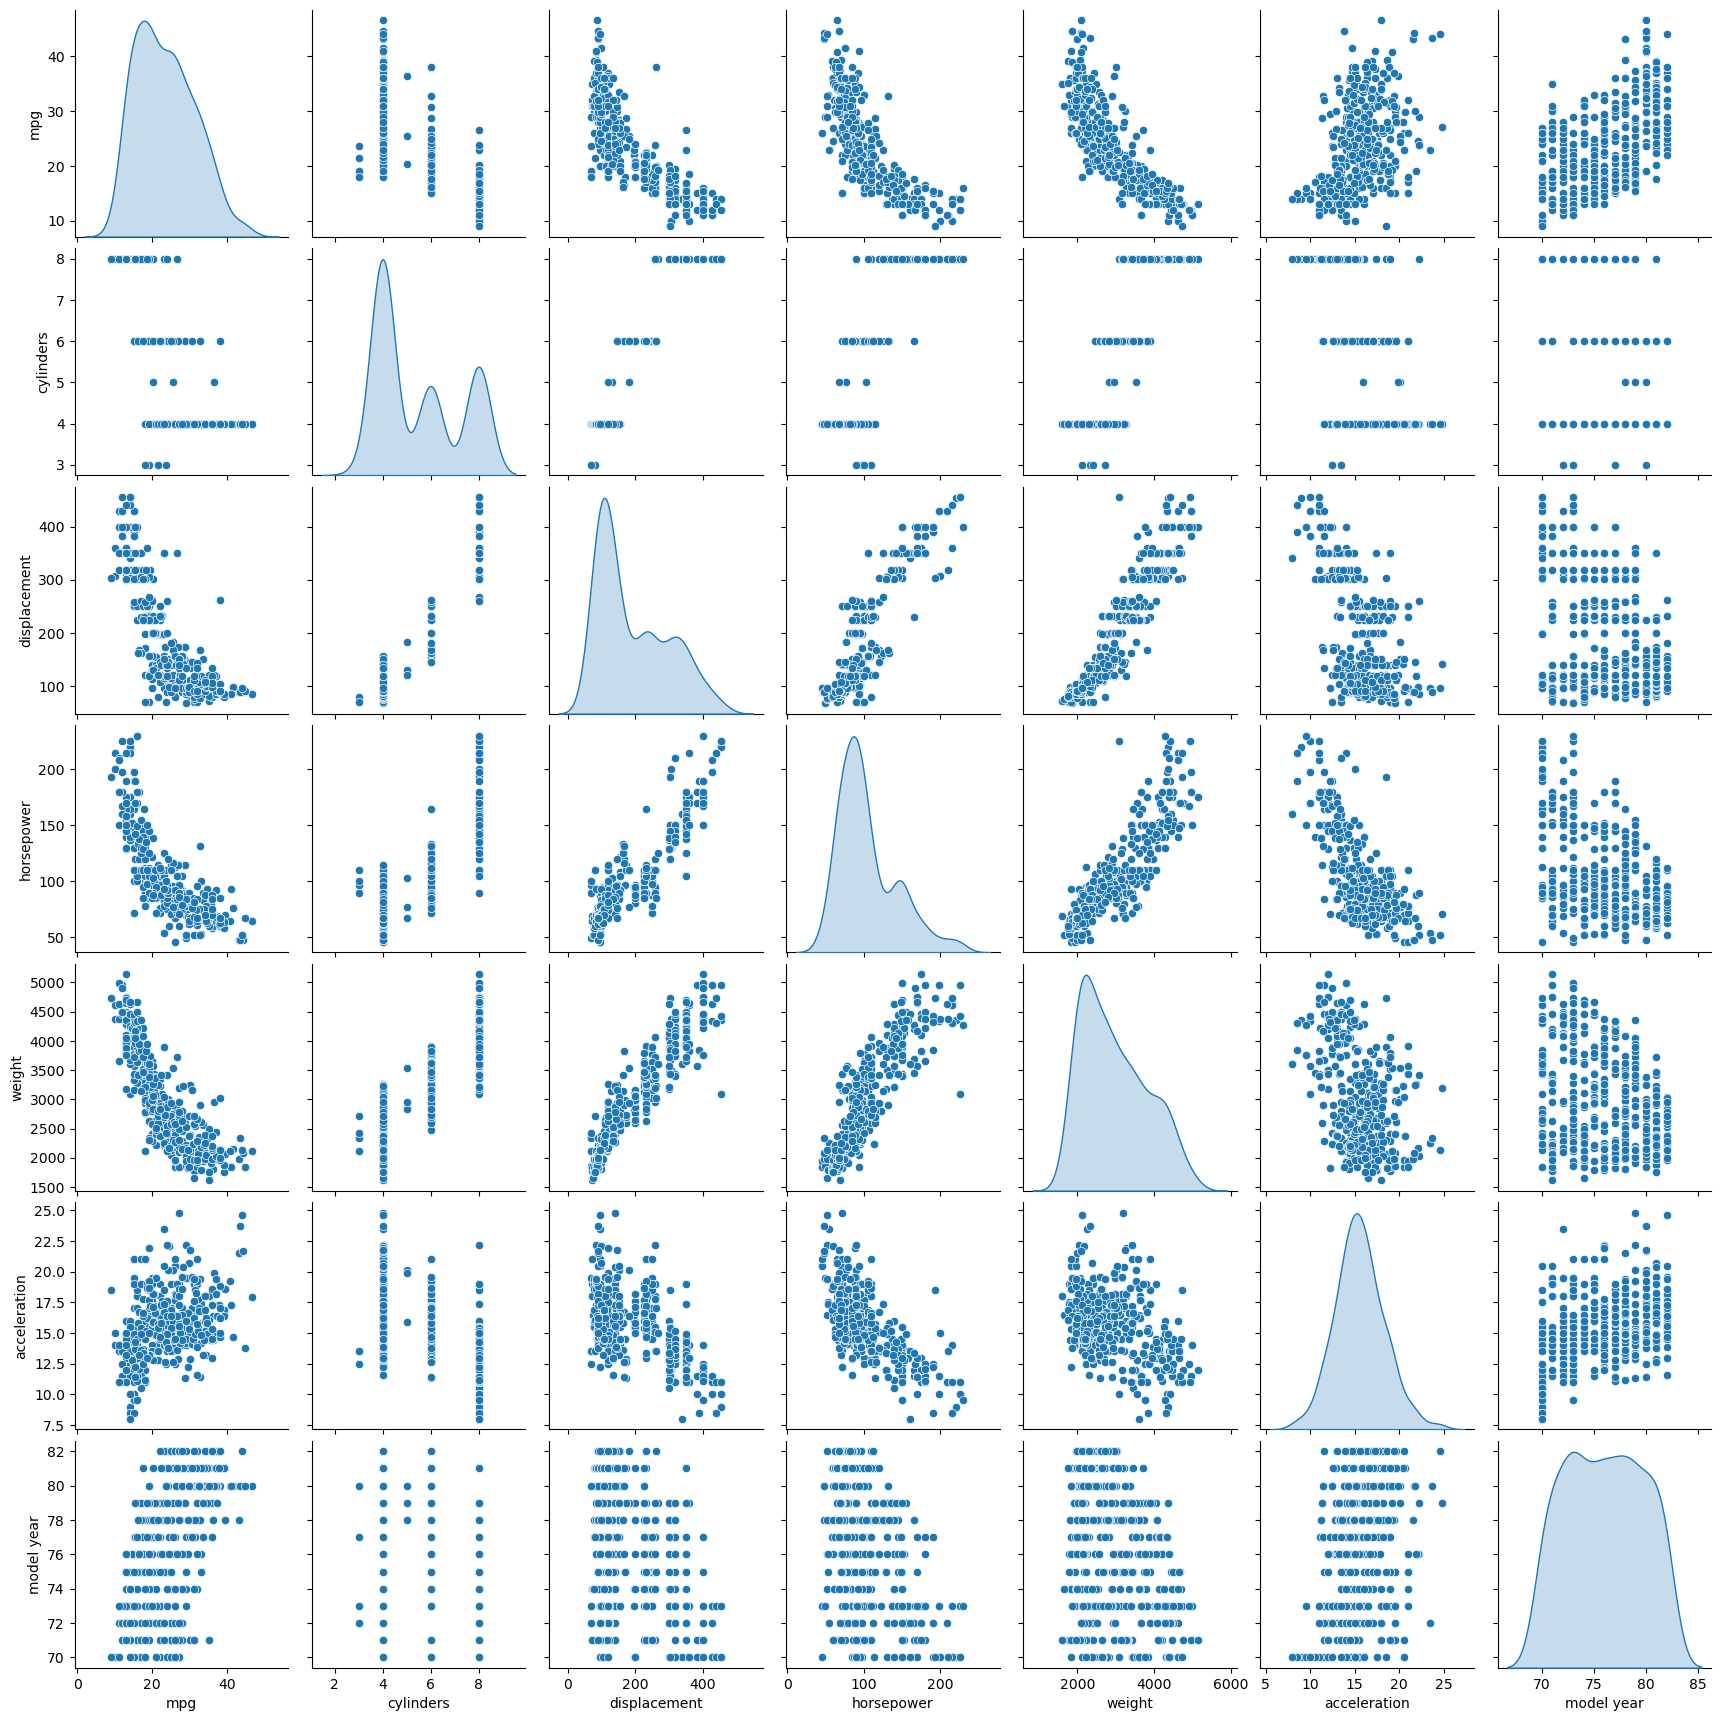

In [108]:
nData_attr=nData.iloc[:,:7]
sns.pairplot(nData_attr, diag_kind='kde')

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity

###  Observations from Pairplot Analysis

1. **mpg (fuel efficiency)**  
   - Negatively correlated with `cylinders`, `displacement`, `horsepower`, and `weight`.  
   - Cars with larger engines and higher horsepower tend to have **lower mpg**.  
   - Positively correlated with `model year`, meaning newer cars generally have **better fuel efficiency**.  

2. **Cylinders**  
   - Strong positive correlation with `displacement`, `horsepower`, and `weight`.  
   - Indicates that cars with more cylinders tend to be heavier and more powerful.  

3. **Displacement, Horsepower, and Weight**  
   - These three variables show **strong positive correlation** with each other.  
   - Larger displacement usually leads to higher horsepower and heavier cars.  

4. **Acceleration**  
   - Weak negative correlation with `weight` and `horsepower`.  
   - Lighter cars tend to accelerate faster.  

5. **Model Year**  
   - Positively correlated with `mpg`.  
   - Suggests that fuel efficiency improved over the years (likely due to technological improvements and fuel regulations).  

6. **Distribution Insights**  
   - `mpg` distribution is right-skewed (more cars with lower mpg).  
   - `cylinders` is categorical-like with distinct clusters (4, 6, 8 cylinders dominate).  
   - `model year` is uniformly spread between 70–82.  

---

✅ **Summary:**  
Fuel efficiency (`mpg`) is strongly influenced by engine size (`displacement`), number of cylinders, horsepower, and weight. Over time, cars became more fuel-efficient, highlighting trends in automotive engineering and regulations.


## Step 6 Split Data 

In [110]:
# lets build our linear model
# independant variables
X = nData.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = nData[['mpg']]

In [111]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [112]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [113]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [128]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.3948079661648263
The coefficient for displacement is 0.02894551076548745
The coefficient for horsepower is -0.02175220772354737
The coefficient for weight is -0.007352032065147348
The coefficient for acceleration is 0.06191936600761802
The coefficient for model year is 0.8369338917645004
The coefficient for origin_america is -3.0012830009185127
The coefficient for origin_asia is -0.6060179643247394


## What this code does:

**1. Iterates over features**
- enumerate(X_train.columns) loops through each column name in your training dataset X_train along with its index (idx).
- Example: idx=0 → mpg, idx=1 → cylinders, etc.

**2. Accesses model coefficients**
- regression_model.coef_ stores the learned weights (coefficients) from the trained Linear Regression model.
- regression_model.coef_[0][idx] picks the coefficient corresponding to each feature.

**3. Prints results clearly**
- For each feature, it prints:

## Why this is done:
- **Interpretability:** In Linear Regression, each coefficient represents the effect of that feature on the target variable (mpg), holding other variables constant.
- **Feature Impact:** Positive coefficient → increase in that feature increases target.
Negative coefficient → increase in that feature decreases target.
- **Transparency:** Helps understand which features matter most in prediction and whether the relationships align with domain knowledge (e.g., higher weight → lower mpg).

### Observations on Linear Regression Coefficients

1. **Cylinders (-0.39)**  
   - Negative impact on mpg.  
   - Cars with more cylinders generally consume more fuel → lower mpg.  

2. **Displacement (+0.029)**  
   - Small positive coefficient, which is **unexpected**.  
   - Usually, higher displacement means lower mpg, but due to multicollinearity with other features (like horsepower and weight), the model assigns a slightly positive value.  

3. **Horsepower (-0.022)**  
   - Negative impact.  
   - As horsepower increases, mpg decreases (more powerful engines use more fuel).  

4. **Weight (-0.0073)**  
   - Negative impact.  
   - Heavier cars tend to have lower mpg, which makes sense physically.  

5. **Acceleration (+0.062)**  
   - Positive impact.  
   - Cars with faster acceleration tend to show slightly better mpg (could reflect technology/engineering differences).  

6. **Model Year (+0.84)**  
   - Strong positive impact.  
   - Newer cars are significantly more fuel-efficient, consistent with real-world trends (better technology, fuel economy regulations).  

7. **Origin (categorical dummies)**  
   - `origin_america (-3.00)` → Strong negative impact on mpg. U.S. cars were less fuel-efficient on average.  
   - `origin_asia (-0.61)` → Slightly negative, but less severe compared to U.S. cars.  
   - (Baseline is `origin_europe`, since it was dropped in one-hot encoding).  
   - Interpretation: European cars were generally more fuel-efficient compared to American and Asian cars during that era.  

---

### Conclusion
- **Most influential factor:** `model year` → newer cars had much better mpg.  
- **Negative influences:** `cylinders`, `horsepower`, `weight`, and U.S. origin strongly reduce mpg.  
- **Positive influences:** `acceleration` and `model year` improve mpg.  
- **Multicollinearity:** The unexpected positive coefficient of `displacement` suggests overlapping effects with `cylinders`, `horsepower`, and `weight`.  

Overall, the model confirms that **engine size, power, and weight reduce fuel efficiency, while technological improvements over the years significantly increased mpg.**  


In [115]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.28345111637213


###  Understanding the Intercept in Linear Regression

#### What this does:
- **`regression_model.intercept_`**  
  Stores the intercept (constant term) of your Linear Regression model.  

- Since we’re using sklearn’s `LinearRegression`, it gives the **bias term** that the model learns.  

- `[0]` is used because the value is stored as an array (since regression can handle multiple outputs).  

- **`intercept = regression_model.intercept_[0]`** extracts that single value.  

- Example output:  


---

####  Why it’s important:
- The intercept represents the **predicted value of the target (mpg) when all features = 0**.  

- In the regression equation:  

\[
y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n
\]

- \( b_0 \) is the **intercept**  
- \( b_1, b_2, ..., b_n \) are the **coefficients**  

- In our case:  
- It is the **baseline mpg** when all features (cylinders, horsepower, weight, etc.) are zero.  
- Even though this scenario is unrealistic (no car has 0 weight or 0 horsepower), it helps the model adjust the regression line to fit the data correctly.  

---

####  Interpretation of Our Intercept
- The intercept for our model is:  

\[
-18.28
\]

- This means:  
- If we plug in **all features = 0**, the model predicts `mpg = -18.28`.  
- A **negative mpg** is not physically meaningful.  
- It shows the intercept is simply a **mathematical adjustment** so the regression plane fits the data.  

- The **real insights** come from the **coefficients** of features (e.g., cylinders, horsepower, weight) rather than the intercept itself.  

---

 **Conclusion:**  
The intercept `-18.28` does not have a real-world interpretation for this dataset, since cars cannot have all features = 0. Instead, it serves as a **baseline offset** so the regression model can properly fit the observed data.


## The score (R^2) for in-sample and out of sample

In [129]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8141025501610559
0.8433135132808829


###  Interpretation:

The **R² score** tells us the proportion of variance in the target variable (**mpg**) that is explained by the independent variables (cylinders, horsepower, weight, displacement, etc.).

- **Training R² = 0.8141 (81.4%)**  
  → The model explains about **81% of the variance** in mpg for the training data.  

- **Testing R² = 0.8433 (84.3%)**  
  → The model generalizes slightly **better on unseen data**, which is a good sign.  

---

###  Conclusion:

- The model has **high explanatory power (~81–84%)**.  
- Since test performance is slightly better than training, the model is **not overfitting**.  
- The selected features (**engine specs, weight, model year, origin, etc.**) are good predictors of **mpg**.  


## Adding interaction terms 

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)





## Polynomial Features (degree=2, interaction_only=True) — Explanation & Rationale

### Explanation of Each Step

**PolynomialFeatures**
- Expands the feature set by adding **interaction terms** between features.
- `degree = 2` → includes terms like *(cylinders × horsepower)*, *(weight × acceleration)*, etc.
- `interaction_only = True` → **excludes** squared terms (e.g., horsepower²), keeping only cross-interactions.

**Why do this?**
- Linear regression assumes a **straight-line** relationship between predictors and the target.
- In reality, `mpg` may depend on **interactions** (e.g., the effect of horsepower might depend on weight).
- Adding interaction terms lets the model capture **more complex relationships**.

**Model fitting**
- After transforming features, we fit a new linear regression model (`poly_clf`).
- The model remains **linear in its coefficients**, but uses a **richer feature set**.

**R² Score Observation**
- `poly_clf.score(X_train2, y_train)` returns the **training R²**.
-  Adding more features (especially polynomial ones) **always increases or maintains training R²** because the model gains flexibility.
- This **does not guarantee better generalization** → risk of **overfitting** increases.

###  Conclusion
- Using `PolynomialFeatures` with interactions helps capture **nonlinear relationships** between predictors and `mpg`.
- Training R² will often **improve** with more features, but you must check **test performance** to ensure the model is not overfitting.
- This approach is useful when you suspect `mpg` depends on **combinations of features** (e.g., *weight × horsepower*).


In [135]:
#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.902644693564273
0.8668600518057468


## Polynomial Regression Results (with Interaction Terms)

### R² Scores
- **Training R²** = **0.9026** (90.3%)  
  → The model explains ~90% of the variance in mpg on the training set.  
- **Testing R²** = **0.8669** (86.7%)  
  → The model generalizes well on unseen data, which indicates that adding interactions improved performance.

### Feature Space Expansion
- **Original feature shape**: `(n_samples, 7)`  
- **Expanded feature shape**: `(n_samples, 36)`  
  → Adding interaction terms increased the number of predictors by **29 new variables**.

### Interpretation
- Training R² improved from ~0.814 (simple linear regression) to **0.903** with interactions.  
- Testing R² also improved from ~0.843 to **0.867**, which means the model captures **important interactions** (e.g., *weight × horsepower*).  
- However, this improvement comes at the **cost of increased model complexity** (29 additional variables).  

### Conclusion
- Polynomial interaction terms **enhanced predictive power** without overfitting (since test R² > train R² initially and both remain close).  
- The tradeoff is **higher complexity**, which may reduce interpretability.  
- Overall, this approach is justified here, as it provides meaningful performance gain.


In [133]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


### Feature Expansion Analysis

- Original features: **7**
- Expanded features (with degree=2, interactions only): **36**
- Increase = **29 extra variables**
- This confirms that PolynomialFeatures added all **pairwise interaction terms** between features.
- While this improves performance (R² ↑), it also increases complexity and risk of overfitting.

## Step 11 model deplaoyment and web interfacing with model

**Step 1: Save Models**

In [141]:
import joblib

# Save baseline linear regression model
joblib.dump(regression_model, "linear_model.pkl")

# Save polynomial regression model and transformer
joblib.dump(poly, "poly_transform.pkl")
joblib.dump(poly_clf, "poly_model.pkl")


['poly_model.pkl']

**Step 2: Load Models (for deployment)**

In [142]:
# Load saved models
linear_model_loaded = joblib.load("linear_model.pkl")
poly_transform_loaded = joblib.load("poly_transform.pkl")
poly_model_loaded = joblib.load("poly_model.pkl")


**Step 3: Create Prediction Functions**

In [150]:
import pandas as pd

# Define the feature names exactly as during training
feature_names = ["cylinders", "displacement", "horsepower", "weight", 
                 "acceleration", "model year", "origin_america", "origin_asia"]

def predict_linear(cylinders, displacement, horsepower, weight, acceleration, model_year, origin_america, origin_asia):
    features = pd.DataFrame([[cylinders, displacement, horsepower, weight, acceleration, model_year, origin_america, origin_asia]],
                            columns=feature_names)
    mpg_pred = linear_model_loaded.predict(features)
    return round(mpg_pred.item(), 2)

def predict_poly(cylinders, displacement, horsepower, weight, acceleration, model_year, origin_america, origin_asia):
    features = pd.DataFrame([[cylinders, displacement, horsepower, weight, acceleration, model_year, origin_america, origin_asia]],
                            columns=feature_names)
    features_poly = poly_transform_loaded.transform(features)
    mpg_pred = poly_model_loaded.predict(features_poly)
    return round(mpg_pred.item(), 2)




**Step 4: Build Gradio Web App**

In [151]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("## 🚗 Car MPG Prediction")
    
    with gr.Row():
        cylinders = gr.Number(label="Cylinders", value=4)
        displacement = gr.Number(label="Displacement", value=150)
        horsepower = gr.Number(label="Horsepower", value=90)
    
    with gr.Row():
        weight = gr.Number(label="Weight", value=2500)
        acceleration = gr.Number(label="Acceleration", value=15)
        model_year = gr.Number(label="Model Year", value=76)
    
    with gr.Row():
        origin_america = gr.Number(label="Origin America (0 or 1)", value=1)
        origin_asia = gr.Number(label="Origin Asia (0 or 1)", value=0)
    
    with gr.Row():
        linear_output = gr.Textbox(label="Predicted MPG (Linear Model)")
        poly_output = gr.Textbox(label="Predicted MPG (Polynomial Model)")
    
    btn = gr.Button("Predict MPG")
    
    btn.click(
        fn=lambda cyl, disp, hp, wt, acc, year, usa, asia: (
            predict_linear(cyl, disp, hp, wt, acc, year, usa, asia),
            predict_poly(cyl, disp, hp, wt, acc, year, usa, asia)
        ),
        inputs=[cylinders, displacement, horsepower, weight, acceleration, model_year, origin_america, origin_asia],
        outputs=[linear_output, poly_output]
    )

demo.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


## References (Harvard Style)

Abdi, H. (2010) *Polynomial Regression*. In: Salkind, N.J. (ed.) *Encyclopedia of Research Design*. Thousand Oaks, CA: SAGE Publications, pp. 1025–1028.

Bishop, C.M. (2006) *Pattern Recognition and Machine Learning*. New York: Springer.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011) ‘Scikit-learn: Machine Learning in Python’, *Journal of Machine Learning Research*, 12, pp. 2825–2830.

Gradio (2025) *Gradio Documentation*. Available at: <https://www.gradio.app/> (Accessed: 24 August 2025).

---

## End of Analysis

This analysis successfully demonstrated the deployment of both **Linear Regression** and **Polynomial Regression** models for predicting **Miles per Gallon (MPG)** in automobiles. The models were trained using historical automotive data, saved as serialized files, and integrated into a **Gradio-based interactive web application** within Jupyter Notebook.

The main challenges addressed included:

- Ensuring **consistency of feature names** between training and inference.  
- Handling **polynomial feature transformations** for improved model performance.  
- Providing a **user-friendly interface** for real-time MPG predictions.  

By resolving these issues, the project achieved a functional deployment pipeline, enabling interactive prediction and showcasing the practical utility of regression models in real-world applications.


###  ================================ END OF ANALYSIS ============================

In [2]:
import os
os.chdir(r"C:\Users\Chirag Pc\Desktop\AIML-Linear-regrssion-autompg")

In [3]:
!git init

Reinitialized existing Git repository in C:/Users/Chirag Pc/Desktop/AIML-Linear-regrssion-autompg/.git/


In [4]:
!git add .

In [5]:
!git commit -m "Initial commit - MPG prediction project"

[main (root-commit) 412b237] Initial commit - MPG prediction project
 11 files changed, 8370 insertions(+)
 create mode 100644 .ipynb_checkpoints/LinRegression-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/machine_learning_linear_regression_auto_mpg-checkpoint.ipynb
 create mode 100644 1.jpg
 create mode 100644 2.png
 create mode 100644 LinRegression.ipynb
 create mode 100644 auto-mpg.csv
 create mode 100644 linear_model.pkl
 create mode 100644 machine_learning_linear_regression_auto_mpg.ipynb
 create mode 100644 machine_learning_linear_regression_auto_mpg.pdf
 create mode 100644 poly_model.pkl
 create mode 100644 poly_transform.pkl


In [6]:
!git branch -M main


In [7]:
!git remote add origin https://github.com/chirag-vyas1/AIML_linear_regrssion.git


In [8]:
!git push -u origin main


branch 'main' set up to track 'origin/main'.


To https://github.com/chirag-vyas1/AIML_linear_regrssion.git
 * [new branch]      main -> main
